In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 4000
from sklearn.cluster import KMeans
from utils import get_model_data

In [3]:
processed_path = '../data/processed/time_series_all.csv'
time_series_all = pd.read_csv(processed_path)

In [72]:
df = get_model_data(time_series_all,date_range=(0,7), pred_day=7)
df.head()

,state,county,fips,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_7_delta_fips,day_7_delta_cases,day_7_delta_deaths
0,alabama,autauga,1001,11.500,0.375,0.250,31.250,81.625000,48.762500,52.875000,...,-31.500,16.50,NaN,-38.000000,NaN,41618.0,55601.0,1001,-20,1
1,alabama,baldwin,1003,20.875,0.500,0.000,31.250,86.625000,47.662500,53.725000,...,-42.125,12.25,-24.5,-31.875000,-33.5,45596.0,218022.0,1003,17,0
2,alabama,barbour,1005,12.625,0.000,0.000,24.000,66.583333,41.627083,49.241667,...,NaN,NaN,NaN,-31.000000,NaN,35199.0,24881.0,1005,-11,-1
3,alabama,bibb,1007,16.000,0.000,0.000,26.375,60.375000,36.375000,44.337500,...,NaN,NaN,NaN,-32.333333,NaN,30254.0,22400.0,1007,6,0
4,alabama,blount,1009,10.625,0.000,0.075,30.950,89.750000,41.680000,47.140000,...,-29.250,16.80,NaN,-34.750000,NaN,34976.0,57840.0,1009,-12,0


In [73]:
df.shape

(1455, 71)

In [81]:
# select only numeric data, drop fips column, drop rows with NA
dfnum = df._get_numeric_data().drop(['fips'],axis=1).dropna()
dfnum.head()

,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_7_delta_fips,day_7_delta_cases,day_7_delta_deaths
1,20.875,0.500,0.0000,31.250000,86.6250,47.662500,53.725000,59.63750,56.025000,67.625000,...,-42.125,12.250000,-24.500,-31.875,-33.500000,45596.0,218022.0,1003,17,0
14,21.000,1.000,0.0625,31.833333,89.0625,43.135417,48.777083,54.99375,51.904167,62.291667,...,-37.250,14.142857,-30.250,-34.625,41.714286,39607.0,83442.0,1043,12,1
16,14.125,0.000,0.2500,30.875000,91.8750,40.800000,47.112500,53.85000,48.525000,60.212500,...,-37.625,14.000000,-37.000,-31.000,-4.000000,31916.0,71385.0,1049,-3,-2
18,29.875,2.625,0.0000,24.125000,71.7500,46.350000,51.062500,55.22500,49.175000,62.375000,...,-38.000,13.000000,-31.625,-35.625,-23.000000,36918.0,102501.0,1055,30,4
22,23.500,1.000,0.0000,33.000000,96.0000,50.900000,56.825000,62.66250,59.712500,70.425000,...,-42.250,13.625000,-31.875,-34.500,3.500000,42398.0,104722.0,1069,17,1


In [82]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(dfnum)
dfnum = pd.DataFrame(scaler.fit_transform(dfnum), columns=dfnum.columns)

In [83]:
dfnum.head()

,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_7_delta_fips,day_7_delta_cases,day_7_delta_deaths
0,-0.509704,-0.024296,-0.959536,-0.571847,0.242575,0.889439,0.974134,1.070522,1.166349,1.289460,...,-0.413515,-0.880616,0.502174,0.696355,-1.260251,-0.428997,-0.308188,-1.749754,0.038655,-0.043333
1,-0.503183,0.545374,-0.952593,-0.540211,0.376829,0.532677,0.565529,0.670108,0.853640,0.887263,...,0.054692,-0.390282,0.135150,0.392182,1.107913,-0.836095,-0.505288,-1.747264,-0.039421,0.443940
2,-0.861822,-0.593966,-0.931764,-0.592185,0.531737,0.348631,0.428066,0.571487,0.597212,0.730470,...,0.018676,-0.427288,-0.295704,0.793138,-0.331427,-1.358886,-0.522946,-1.746890,-0.273649,-1.017877
3,-0.040213,2.396801,-0.959536,-0.958260,-0.576720,0.786006,0.754261,0.690048,0.646537,0.893548,...,-0.017340,-0.686332,0.047383,0.281573,-0.929653,-1.018878,-0.477375,-1.746517,0.241653,1.905756
4,-0.372769,0.545374,-0.959536,-0.476939,0.758937,1.144575,1.230135,1.331357,1.446175,1.500613,...,-0.425520,-0.524430,0.031426,0.406008,-0.095286,-0.646379,-0.474122,-1.745645,0.038655,0.443940


In [84]:
from sklearn.decomposition import PCA
full_pca = PCA(random_state=0).fit(dfnum)
full_pca.n_components_

68

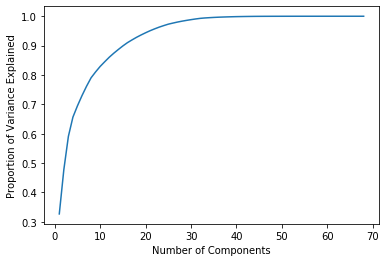

In [85]:
# Calculate the cumulative sum of the variance explained by each component.
cum_exp_var = np.cumsum(full_pca.explained_variance_ratio_)
plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

In [86]:
cum_exp_var_df = pd.DataFrame([cum_exp_var], columns=np.arange(len(cum_exp_var))+1, index=['Variance Explained'])
cum_exp_var_df.columns.name = 'Number of PCs'
cum_exp_var_df

Number of PCs,1,2,3,4,5,6,7,8,9,10,...,59,60,61,62,63,64,65,66,67,68
Variance Explained,0.326614,0.477385,0.590618,0.65635,0.694865,0.729717,0.76155,0.790372,0.810523,0.82904,...,0.999999,0.999999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [87]:
final_pca = PCA(4, random_state=0).fit(dfnum)
dfnum_pca = final_pca.transform(dfnum)

In [88]:
dfnum.shape

(551, 68)

In [89]:
dfnum_pca.shape

(551, 4)

In [90]:
# cross validate number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(dfnum_pca)
    wcss.append(kmeans.inertia_)

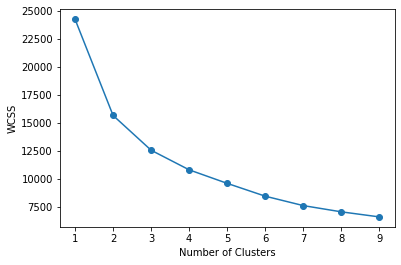

In [91]:
plt.plot(range(1,10), wcss,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');
# 4

In [92]:
kmeans_final = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(dfnum_pca)

In [93]:
dfnum_pca_kmeans = pd.concat([dfnum.reset_index(drop = True),pd.DataFrame(dfnum_pca)],axis =1)
dfnum_pca_kmeans.columns.values[-4:] = ['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4']
dfnum_pca_kmeans['Kmeans Cluster'] = kmeans_final.labels_
dfnum_pca_kmeans.head()


,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,income_2018,pop_2018,day_7_delta_fips,day_7_delta_cases,day_7_delta_deaths,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Kmeans Cluster
0,-0.509704,-0.024296,-0.959536,-0.571847,0.242575,0.889439,0.974134,1.070522,1.166349,1.289460,...,-0.428997,-0.308188,-1.749754,0.038655,-0.043333,5.909279,-2.405250,-0.649002,0.209506,2
1,-0.503183,0.545374,-0.952593,-0.540211,0.376829,0.532677,0.565529,0.670108,0.853640,0.887263,...,-0.836095,-0.505288,-1.747264,-0.039421,0.443940,4.149212,-3.064456,-1.144863,-0.071357,0
2,-0.861822,-0.593966,-0.931764,-0.592185,0.531737,0.348631,0.428066,0.571487,0.597212,0.730470,...,-1.358886,-0.522946,-1.746890,-0.273649,-1.017877,3.636844,-3.285476,-0.769971,-0.759859,0
3,-0.040213,2.396801,-0.959536,-0.958260,-0.576720,0.786006,0.754261,0.690048,0.646537,0.893548,...,-1.018878,-0.477375,-1.746517,0.241653,1.905756,4.896317,-3.431442,-4.168197,-1.312811,0
4,-0.372769,0.545374,-0.959536,-0.476939,0.758937,1.144575,1.230135,1.331357,1.446175,1.500613,...,-0.646379,-0.474122,-1.745645,0.038655,0.443940,7.097980,-3.363250,-1.555055,-0.638239,2


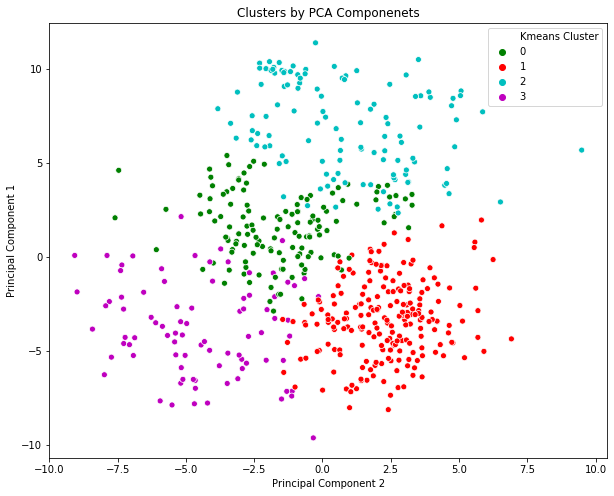

In [96]:
x_axis = dfnum_pca_kmeans['Principal Component 2']
y_axis = dfnum_pca_kmeans['Principal Component 1']
plt.figure(figsize =(10,8))
sns.scatterplot(x_axis, y_axis, hue = dfnum_pca_kmeans['Kmeans Cluster'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Componenets')
plt.show()

In [ ]:
# what counties are in each cluster?
